In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

### EDA

In [2]:
df = pd.read_csv("happiness_ind_18.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [3]:
df[df["Country or region"] == "India"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
132,133,India,4.19,0.721,0.747,0.485,0.539,0.172,0.093


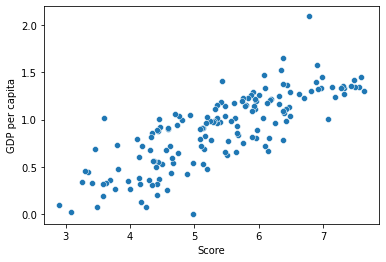

In [4]:
sns.scatterplot(x = df["Score"],y = df["GDP per capita"])
plt.show()

In [5]:
cols = df.columns
for i in range(3,len(cols)):
    corr = df["Score"].corr(df[cols[i]])
    print(f"Score - {cols[i]} : {corr}")

Score - GDP per capita : 0.8021239467301907
Score - Social support : 0.7457601649725755
Score - Healthy life expectancy : 0.7758136033302464
Score - Freedom to make life choices : 0.5442799358332935
Score - Generosity : 0.13582474708113781
Score - Perceptions of corruption : 0.4084052796677772


<AxesSubplot:>

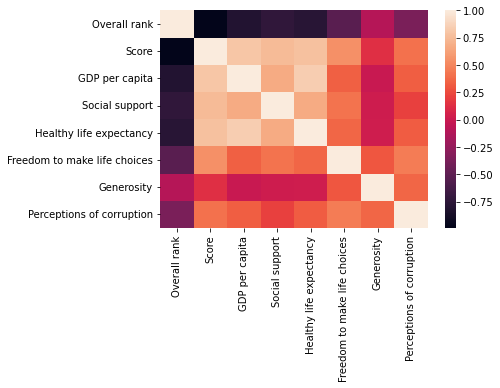

In [6]:
sns.heatmap(df.corr())

### Model
will train the model on 2018 data and will test the model on 2019 data.

In [7]:
rg = linear_model.LinearRegression()
# rg.fit(independent variable,depandent variable)
# y = mX + c
# rg.fit(X, y), where X represents the input features and y represents the target values.
rg.fit(df[["GDP per capita"]],df["Score"])

LinearRegression()

In [8]:
rg.predict([[1.340]])

array([6.40365244])

In [9]:
# for y = mX + c
m = rg.coef_
c = rg.intercept_
print(m,c)

[2.29123362] 3.3333993932306143


## Results for Linear Regression in single variable

In [10]:
def calculate_error(predicted,actual):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual, predicted)
    print("MAE:", mae)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(actual, predicted)
    print("MSE:", mse)

    # Root Mean Squared Error (RMSE)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)

    # R-squared (Coefficient of Determination)
    r2 = r2_score(actual, predicted)
    print("R-squared:", r2)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

predicted = [rg.predict([[x]])[0] for x in df["GDP per capita"]]

df_19 = pd.read_csv("happiness_ind.csv")

actual = df_19["GDP per capita"].tolist()
    
calculate_error(predicted,actual)

MAE: 4.47076923076923
MSE: 20.468491361484638
RMSE: 4.524211683982596
R-squared: -128.7965188930171


## Linear regression in multiple variables

Using top 3 correlated attributes <br>
Score - GDP per capita : 0.8021239467301907 <br>
Score - Social support : 0.7457601649725755 <br>
Score - Healthy life expectancy : 0.7758136033302464 <br>

In [12]:
rg_mult = linear_model.LinearRegression()
rg_mult.fit(df[["GDP per capita","Healthy life expectancy","Social support"]],df["Score"])
# y = m1X1 + m2X2 + m3X3 + c
m = rg_mult.coef_
c = rg_mult.intercept_
print(m,c)

[1.10038537 1.0246591  1.24270381] 2.275208902018039


In [25]:
rg_mult.predict([[1.305,0.874,1.592]])

array([6.58514833])

In [14]:
gdp = df_19["GDP per capita"]
hle = df_19["Healthy life expectancy"]
ss = df_19["Social support"]

new_data = pd.DataFrame({
    "GDP per capita": gdp,
    "Healthy life expectancy": hle,
    "Social support": ss
})

pred = rg_mult.predict(new_data)
actual = df_19["Score"]
calculate_error(pred,actual)

MAE: 0.49463256021696583
MSE: 0.3525315547683109
RMSE: 0.5937436776659697
R-squared: 0.7136435123337306


## Saving model

In [16]:
import pickle
with open('model_pickle','wb') as F:
    pickle.dump(rg_mult,F)

In [18]:
with open('model_pickle','rb') as F:
    model = pickle.load(F)

model.predict([[1.305,0.874,1.592]]) 

array([6.58514833])

In [20]:
import joblib
joblib.dump(rg_mult,'model_joblib')

['model_joblib']

In [26]:
model_j = joblib.load('model_joblib')
model_j.predict([[1.305,0.874,1.592]]) 

array([6.58514833])

## One hot encoding for categorical data

In [29]:
df_cat = pd.read_csv('carprices.csv')
df_cat

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


##### As the data for Car model is also important for making a model, we need to convert or encode the categorical data into numeric. For this we can use One hot encoding.

<img src="one_hot_encoding.png" alt="image_description">

In [32]:
dummies = pd.get_dummies(df_cat["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [34]:
merged = pd.concat([df_cat,dummies],axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


##### whenever we do one hot encoding, we should always drop any one of the column.. because that column can be derived using remaining ones. this is known as dummy variable trap.

In [37]:
final = merged.drop(['Car Model','Audi A5'],axis = 'columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [42]:
X = final.drop(['Sell Price($)'],axis = 'columns')
y = final["Sell Price($)"]
model_cat = linear_model.LinearRegression()
model_cat.fit(X,y)

LinearRegression()

In [43]:
model_cat.predict([[69000,6,1,0]])

array([18705.2723644])

In [44]:
# checking the accuracy of the model
model_cat.score(X,y)

0.9417050937281082

###### Using sklearn library for integer encoding.

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df_le = df_cat
df_le["Car Model"] = le.fit_transform(df_le["Car Model"])
df_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [55]:
X = df_cat[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [56]:
y = df_cat["Sell Price($)"]

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()

TypeError: __init__() got an unexpected keyword argument 'categorical_features'